In [9]:
from google.colab import files
uploaded = files.upload()



Saving pharma-data.csv to pharma-data.csv


In [10]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['pharma-data.csv']))


In [11]:
# Display first few rows
display(df.head())


,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Distributor        254082 non-null  object 
 1   Customer Name      254082 non-null  object 
 2   City               254082 non-null  object 
 3   Country            254082 non-null  object 
 4   Latitude           254082 non-null  float64
 5   Longitude          254082 non-null  float64
 6   Channel            254082 non-null  object 
 7   Sub-channel        254082 non-null  object 
 8   Product Name       254082 non-null  object 
 9   Product Class      254082 non-null  object 
 10  Quantity           254082 non-null  float64
 11  Price              254082 non-null  int64  
 12  Sales              254082 non-null  float64
 13  Month              254082 non-null  object 
 14  Year               254082 non-null  int64  
 15  Name of Sales Rep  254082 non-null  object 
 16  Ma

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)
if duplicates > 0:
    df = df.drop_duplicates()

Number of duplicate rows: 4


In [17]:
# Summary statistics
display(df.describe())

,Latitude,Longitude,Quantity,Price,Sales,Year
count,254078.000000,254078.000000,254078.000000,254078.000000,2.540780e+05,254078.000000
mean,50.962216,10.803216,112.873680,412.210510,4.643841e+04,2018.385193
std,1.625536,4.143295,744.316142,224.963357,3.491945e+05,1.041356
min,47.514200,6.083800,-7200.000000,22.000000,-4.161600e+06,2017.000000
25%,49.805600,7.891100,5.000000,195.000000,1.704000e+03,2018.000000
50%,51.133300,9.397800,20.000000,430.000000,5.850000e+03,2018.000000
75%,52.083300,12.133300,50.000000,605.000000,2.159175e+04,2019.000000
max,54.781900,23.566700,117600.000000,794.000000,7.420560e+07,2020.000000


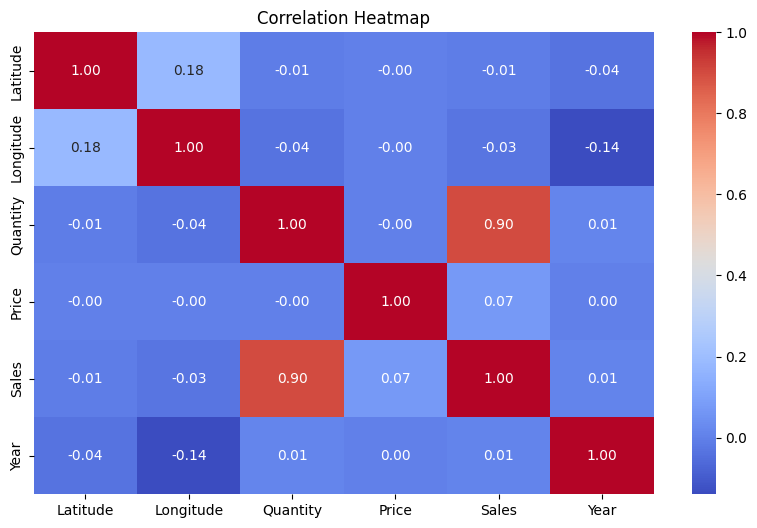

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


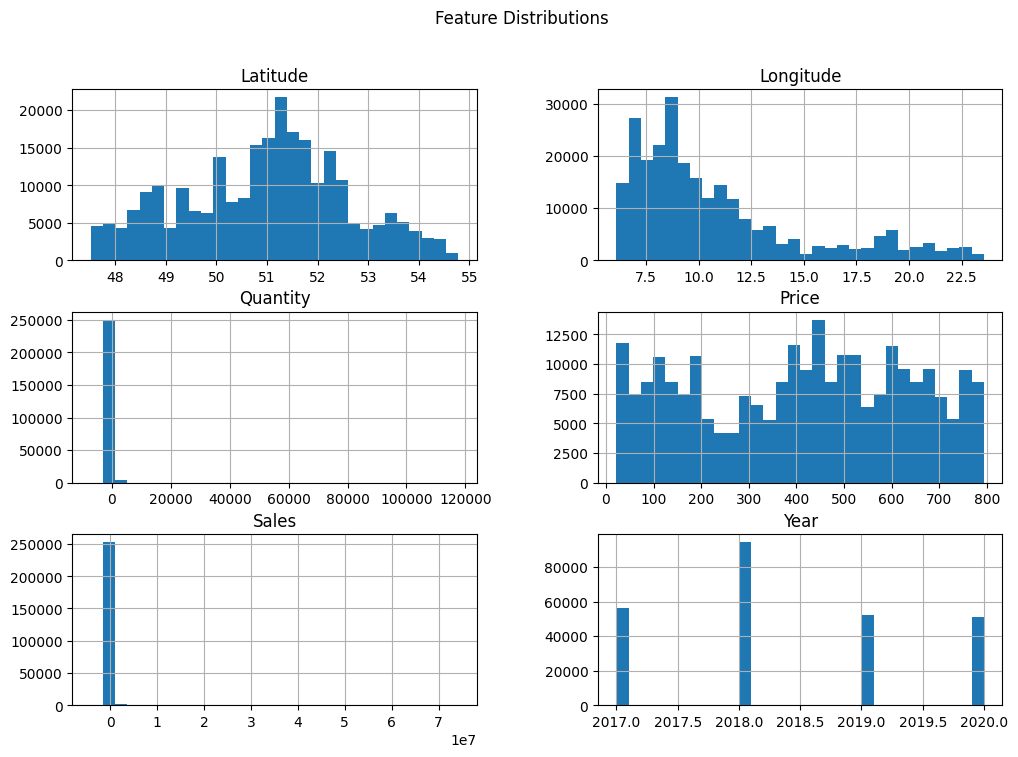

In [20]:
# Distribution of numerical features
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()


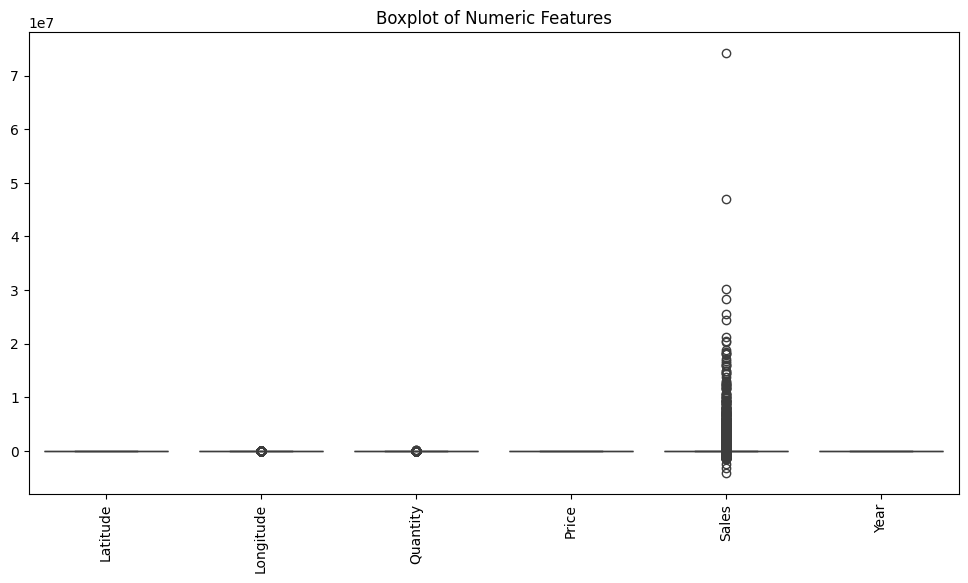

In [21]:
# Boxplot to check for outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features")
plt.show()

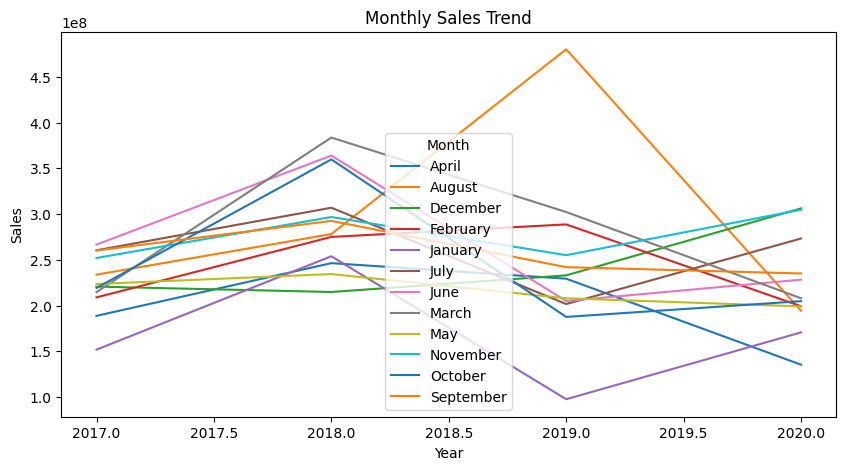

Insight: Identifying peak sales months can help pharmaceutical companies plan inventory and marketing campaigns.


In [22]:
# Real-World Insights and Implementations

# 1. **Sales Trend Analysis**
if 'Year' in df.columns and 'Month' in df.columns and 'Sales' in df.columns:
    sales_trend = df.groupby(['Year', 'Month'])['Sales'].sum().unstack()
    sales_trend.plot(kind='line', title='Monthly Sales Trend', figsize=(10,5))
    plt.ylabel("Sales")
    plt.show()
    print("Insight: Identifying peak sales months can help pharmaceutical companies plan inventory and marketing campaigns.")


Top-Selling Products:
 Product Name
Ionclotide               169083391.0
Tetratanyl               126091294.0
Sumanazole               113861431.0
Betanem                  107073473.0
Docstryl Rivacin         103811886.0
Travoloride              101167660.0
Propratecan              100878712.0
Ketastadil                97313783.0
Nevanide Actozide         96643552.0
Cephozumab Synmethate     95320320.0
Name: Sales, dtype: float64


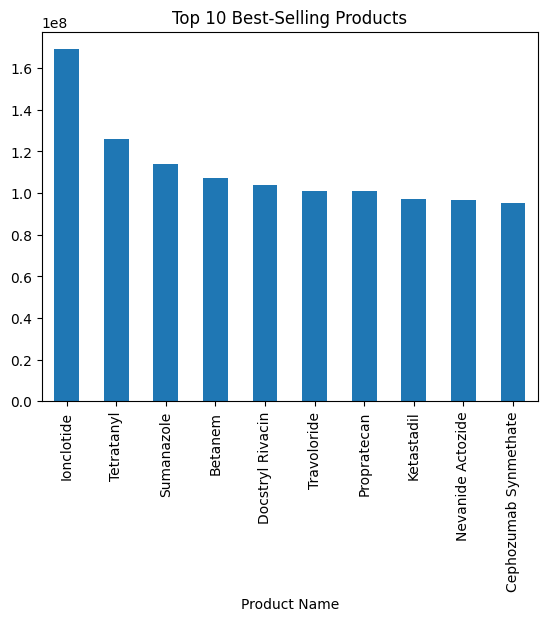

Insight: Helps manufacturers focus on high-demand products and optimize production.


In [23]:
# 2. **Top-Selling Products**
if 'Product Name' in df.columns and 'Sales' in df.columns:
    top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
    print("Top-Selling Products:\n", top_products.head(10))
    top_products.head(10).plot(kind='bar', title='Top 10 Best-Selling Products')
    plt.show()
    print("Insight: Helps manufacturers focus on high-demand products and optimize production.")


Sales by Country:
 Country
Germany    1.111810e+10
Poland     6.808759e+08
Name: Sales, dtype: float64


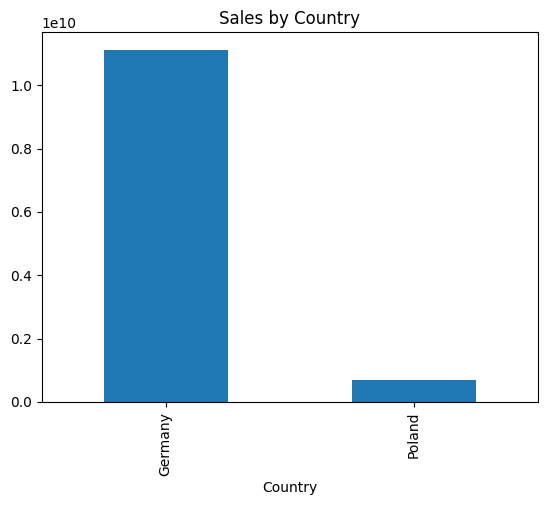

Insight: Allows companies to allocate resources efficiently based on regional demand.


In [24]:
# 3. **Sales by Region (Country & City Level)**
if 'Country' in df.columns and 'Sales' in df.columns:
    country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
    print("Sales by Country:\n", country_sales)
    country_sales.plot(kind='bar', title='Sales by Country')
    plt.show()
    print("Insight: Allows companies to allocate resources efficiently based on regional demand.")

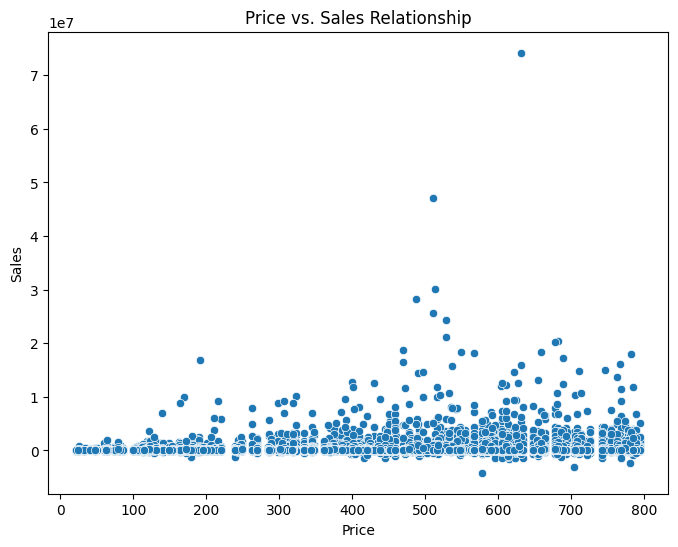

Insight: Understanding price elasticity helps in setting competitive pricing strategies.


In [25]:
# 4. **Pricing Strategy Analysis**
if 'Price' in df.columns and 'Sales' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=df['Price'], y=df['Sales'])
    plt.title("Price vs. Sales Relationship")
    plt.show()
    print("Insight: Understanding price elasticity helps in setting competitive pricing strategies.")

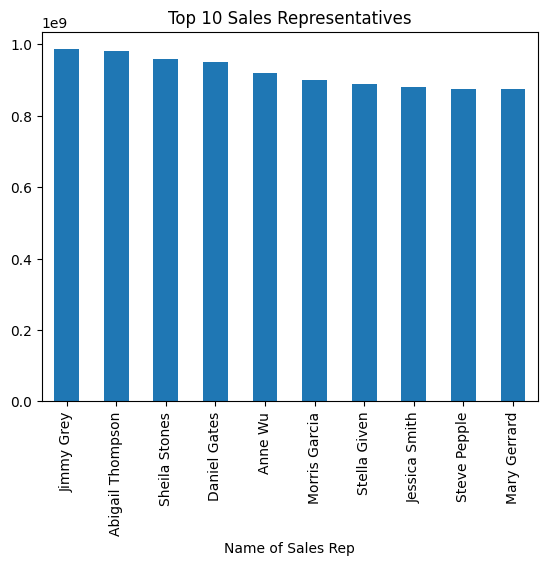

Insight: Helps identify top-performing sales reps and areas for improvement.


In [26]:
# 5. **Sales Team Performance**
if 'Name of Sales Rep' in df.columns and 'Sales' in df.columns:
    sales_rep_performance = df.groupby('Name of Sales Rep')['Sales'].sum().sort_values(ascending=False)
    sales_rep_performance.head(10).plot(kind='bar', title='Top 10 Sales Representatives')
    plt.show()
    print("Insight: Helps identify top-performing sales reps and areas for improvement.")

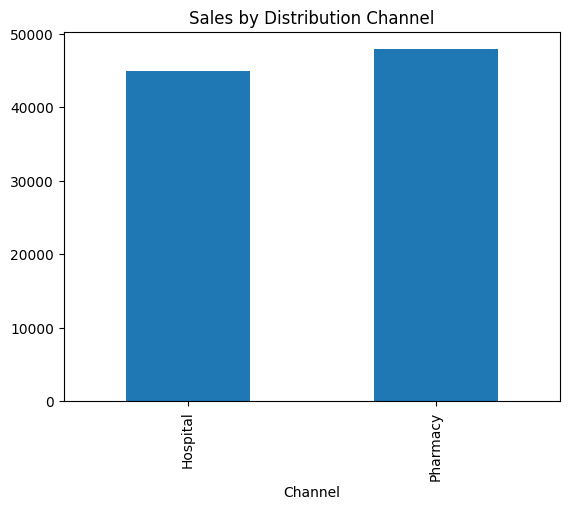

Insight: Identifies the most effective sales channels for maximum revenue.


In [27]:
# 6. **Distribution Channel Effectiveness**
if 'Channel' in df.columns and 'Sales' in df.columns:
    channel_sales = df.groupby('Channel')['Sales'].mean()
    channel_sales.plot(kind='bar', title='Sales by Distribution Channel')
    plt.show()
    print("Insight: Identifies the most effective sales channels for maximum revenue.")

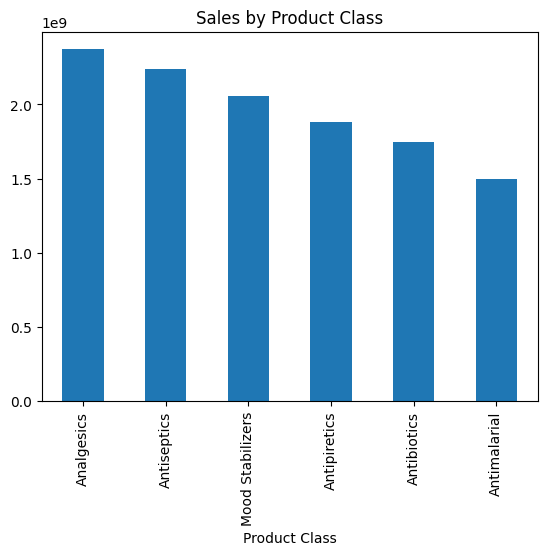

Insight: Helps identify which product categories contribute the most to revenue.


In [28]:
# 7. **Product Class Performance**
if 'Product Class' in df.columns and 'Sales' in df.columns:
    class_sales = df.groupby('Product Class')['Sales'].sum().sort_values(ascending=False)
    class_sales.plot(kind='bar', title='Sales by Product Class')
    plt.show()
    print("Insight: Helps identify which product categories contribute the most to revenue.")


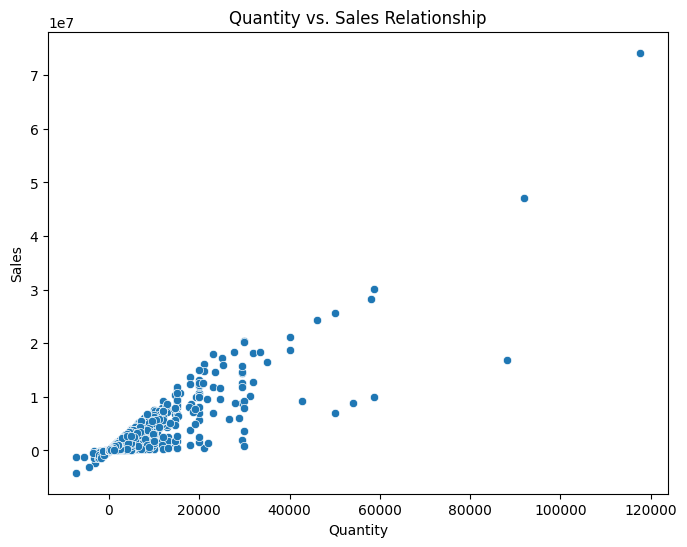

Insight: Helps maintain optimal stock levels to avoid overstocking or shortages.


In [29]:
# 8. **Stock Optimization**
if 'Quantity' in df.columns and 'Sales' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=df['Quantity'], y=df['Sales'])
    plt.title("Quantity vs. Sales Relationship")
    plt.show()
    print("Insight: Helps maintain optimal stock levels to avoid overstocking or shortages.")

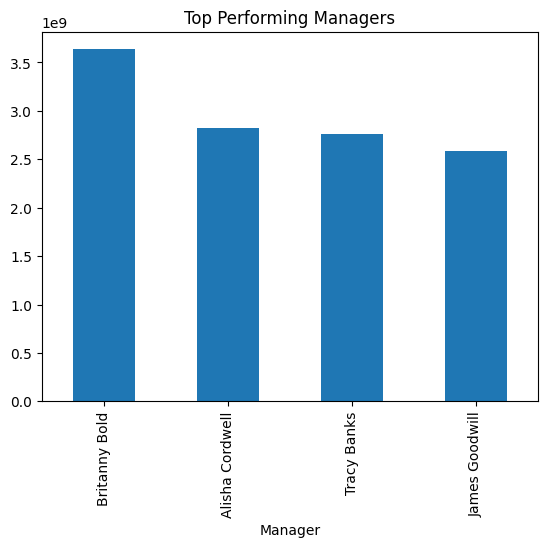

Insight: Helps assess managerial effectiveness in driving sales.


In [30]:
# 9. **Sales Manager Performance**
if 'Manager' in df.columns and 'Sales' in df.columns:
    manager_performance = df.groupby('Manager')['Sales'].sum().sort_values(ascending=False)
    manager_performance.head(10).plot(kind='bar', title='Top Performing Managers')
    plt.show()
    print("Insight: Helps assess managerial effectiveness in driving sales.")

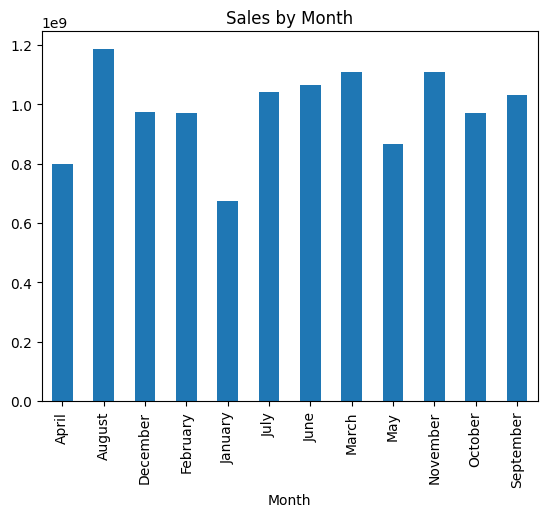

Insight: Identifying seasonal demand trends helps in better forecasting and resource allocation.


In [31]:
# 10. **Seasonal Demand Analysis**
if 'Month' in df.columns and 'Sales' in df.columns:
    month_sales = df.groupby('Month')['Sales'].sum()
    month_sales.plot(kind='bar', title='Sales by Month')
    plt.show()
    print("Insight: Identifying seasonal demand trends helps in better forecasting and resource allocation.")